In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
plt.style.use('seaborn-darkgrid')
%matplotlib inline
prop = font_manager.FontProperties('Segoe UI')

In [2]:
##### define parameter arrays ######
#capture rate (CR), 
#efficiency (eta), 
#ratio of power plant to CCS construction energy (r_PP_CCS), and  
#ratio of CCS construction to operation energy (r) as arrays
CR_array=list(np.arange(0.0,1.05,0.05))
eta_array=np.arange(0.25,0.7,0.05)
r_PP_CCS_array=[0.15]#np.arange(0.05,2.05,0.05)
r_array=[0.15]#np.arange(0.0,10.1,0.1)

In [3]:
# b is fraction of electricity used for CCS [kWh/kWh = dmnl]
# EROI_1 is EROI where CCS construction energy is a ratio of power plant construction energy [MJ_e/MW/(MJ_p/MW) = dmnl]
# EROI_1_adj makes adjustment for electrical output [MJ_p/MJ_p = dmnl]
# EROI_2 is EROI where CCS cons. energy is a ratio of CCS operation energy [MJ_e/MJ_p = dmnl]
# EROI_2_adj makes adjustment for electrical output [MJ_p/MJ_p = dmnl]
# E is emissions [kg CO2/kWh]
b = np.zeros((len(CR_array), len(eta_array)))
CCS_op = np.zeros((len(CR_array)))
Elec_CO2 = np.zeros((len(eta_array)))
EROI_1 =np.zeros((len(CR_array), len(eta_array), len(r_PP_CCS_array))) #EROI using r_PP_CCS, units [dmnl]
EROI_1_adj =np.zeros((len(CR_array), len(eta_array), len(r_PP_CCS_array))) 
EROI_2 =np.zeros((len(CR_array), len(eta_array), len(r_array))) #EROI using r, units [dmnl]
EROI_2_adj =np.zeros((len(CR_array), len(eta_array), len(r_array)))
EROI_2x =np.zeros((len(CR_array_x), len(eta_array), len(r_array))) #EROI using r, units [dmnl]
EROI_2x_adj =np.zeros((len(CR_array_x), len(eta_array), len(r_array)))
E =np.zeros((len(CR_array), len(eta_array))) #Emissions, units [kg CO2/kWh]

NameError: name 'CR_array_x' is not defined

In [223]:
##### Define parameters #####
PP_L = 30 #power plant lifetime [yrs]
PP_CF = 0.5 #power plant capacity factor [dmnl]
CCS_L = 30 #CCS plant lifetime [yrs]

C_CO2 = 0.088 #carbon dioxide content of coal [kg/MJ]

PP_cons_energy = 40000 #energy cost of power plant construction [MJ/MW], does not include energy embodied in materials

In [235]:
##### loop through calculations #####
for i in range(len(CR_array)):
    #Define electricity penalty (b) curve from Sanpasternich (2009) Figure 8, units [kWh/kg CO2] 
    CCS_op[i] = 25.957*CR_array[i]**6 - 85.031*CR_array[i]**5 + \
    114.5*CR_array[i]**4 - 80.385*CR_array[i]**3 + \
    31.47*CR_array[i]**2 - 6.7725*CR_array[i]  + 1.1137 
    for j in range(len(eta_array)):
        PP_op = 0.01 #operational cost of coal fuel cycle [MJ/MJ coal = dmnl]
        PP_op_L = 1*8760*PP_L*PP_CF*PP_op/eta_array[j] #operational cost of coal fuel cycle over plant lifetime output [kWh]
        #define carbon intensity of electricity, units [kg CO2/kWh]
        Elec_CO2[j] = C_CO2*3.6/eta_array[j] 
        #energy penalty of CCS, units [dmnl]
        b[i,j] = CCS_op[i]*Elec_CO2[j]*CR_array[i]
        #emissions
        E[i,j] = Elec_CO2[j]*(1-CR_array[i])
        for k in range(len(r_PP_CCS_array)):
            #energy cost of constructing CCS plant
            CCS_cons_energy = r_PP_CCS_array[k]*PP_cons_energy 
            EROI_1[i,j,k] = 1*8760*PP_L*PP_CF*(1-b[i,j])*3.6/\
                    (PP_cons_energy + PP_op_L + CCS_cons_energy*PP_L/CCS_L) 
            EROI_1_adj[i,j,k] = EROI_1[i,j,k]/0.3
        for l in range(len(r_array)):                
            #energy cost of operating CCS plant
            EROI_2[i,j,l] = 1*8760*PP_L*PP_CF*(1-b[i,j])/\
                    (PP_cons_energy + PP_op_L + r_array[l]*CCS_op[i] + CCS_cons_energy*PP_L/CCS_L)
            EROI_2_adj[i,j,l] = EROI_2[i,j,l]/0.3    

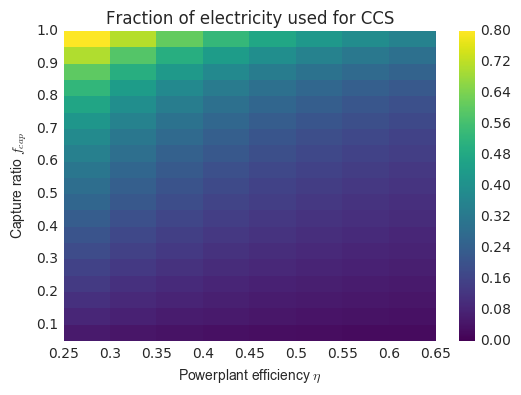

In [236]:
plt.pcolor(b,cmap='viridis',vmax=0.8)
plt.colorbar()
xk=1
x=eta_array
yk=2
y=CR_array
ax=plt.gca()
ax.set_xticks(range(len(x)+1)[::xk])
ax.set_xticklabels(x[::xk])
ax.set_yticks(range(len(y)+1)[::yk])
ax.set_yticklabels(y[::yk])
plt.xlim(0,len(x)-1)
plt.ylim(1,len(y)-1)
plt.xlabel('Powerplant efficiency $\eta$')
plt.ylabel('Capture ratio $f_{cap}$')
plt.title('Fraction of electricity used for CCS')
plt.show()

0.15


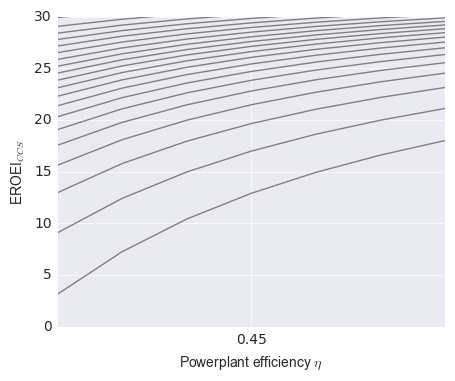

In [237]:
fig=plt.figure(figsize=(5,4))
ax=fig.gca()
names = ['CR', 'eta', 'r']
A=EROI_1_adj
r=0
print(r_PP_CCS_array[r])
index = pd.MultiIndex.from_product([range(s)for s in A.shape], names=names)
df = pd.DataFrame({'A': A.flatten()}, index=index)['A']
df = df.unstack(level='CR').swaplevel().sort_index()
df.loc[r].plot(ax=ax,color='grey',legend=None)
plt.ylim(0,30)
xk=4
x=eta_array
ax.set_xticks(range(len(x)+1)[::xk])
ax.set_xticklabels(x[::xk])
plt.xlim(1,len(x)-2)
plt.xlabel('Powerplant efficiency $\eta$')
plt.ylabel('EROEI$_{CCS}$')
plt.show()

0.15


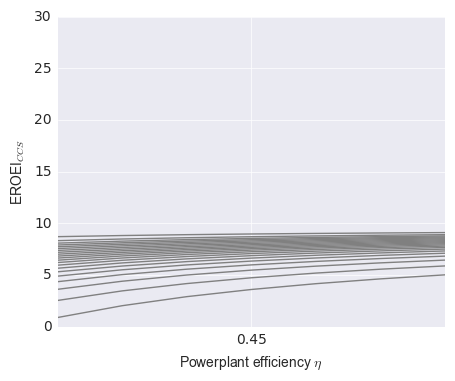

In [238]:
fig=plt.figure(figsize=(5,4))
ax=fig.gca()
names = ['CR', 'eta', 'r']
A=EROI_2_adj
r=0
print(r_array[r])
index = pd.MultiIndex.from_product([range(s)for s in A.shape], names=names)
df = pd.DataFrame({'A': A.flatten()}, index=index)['A']
df = df.unstack(level='CR').swaplevel().sort_index()
df.loc[r].plot(ax=ax,color='grey',legend=None)
plt.ylim(0,30)
xk=4
x=eta_array
ax.set_xticks(range(len(x)+1)[::xk])
ax.set_xticklabels(x[::xk])
plt.xlim(1,len(x)-2)
plt.xlabel('Powerplant efficiency $\eta$')
plt.ylabel('EROEI$_{CCS}$')
plt.show()